<a href="https://colab.research.google.com/github/hasanfarhan33/colabCodes/blob/main/learningPyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tensors**
*   Used to encode input and output of a model  
*   Can run on GPUs and other hardware accelerators 
*   Share same underlying memory with NumPy arrays 



In [2]:
import torch 
import numpy as np 

# Tensors can be initialized in various ways 
*   Directly from data
*   From numpy array 
*   From another Tensor 
*   With random or constant values 



In [3]:
#From data
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

#From NumPy array 
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

#From another tensor 
x_ones = torch.ones_like(x_data) #retains the property of x_data
print(f'Ones Tensor: \n {x_ones} \n')

x_rand = torch.rand_like(x_data, dtype = torch.float) #overrides the datatype of x_data
print(f'Random Tensor: \n {x_rand} \n')

#With random or constant values 
shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f'Random Tensor: \n {rand_tensor} \n')
print(f'Ones Tensor: \n {ones_tensor} \n')
print(f'Zeros Tensor: \n {zeros_tensor}')

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.5046, 0.9507],
        [0.1439, 0.3505]]) 

Random Tensor: 
 tensor([[0.1579, 0.4166, 0.4119],
        [0.6534, 0.9042, 0.4556]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


# Attributes of a Tensor

In [4]:
tensor = torch.rand(3, 4)
print(f'Shape of Tensor: {tensor.shape}')
print(f'Datatype of Tensor: {tensor.dtype}')
print(f'Device the Tensor is stored in: {tensor.device}')

Shape of Tensor: torch.Size([3, 4])
Datatype of Tensor: torch.float32
Device the Tensor is stored in: cpu


# `Operations on a Tensor`

Moving a Tensor to a GPU if available 

In [5]:
if torch.cuda.is_available():
  tensor = tensor.to('cuda')

Numpy-like indexing and slicing 

In [6]:
tensor = torch.ones(4, 4)
print(f'First row: {tensor[0]}')
print(f'First column: {tensor[:, 0]}')
print(f'Last column: {tensor[..., -1]}')
tensor[:, 1] = 0 
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


Joining Tensors

In [7]:
t1 = torch.cat([tensor, tensor, tensor], dim = 1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


Arithmetic Operations

In [8]:
#Matrix multiplication y1 = y2 = y3
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)
y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out = y3)

#Element-wise product z1 = z2 = z3
z1 = tensor * tensor 
z2 = tensor.mul(tensor)
z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out = z3)

print("y1: ", y1)
print("y2: ", y2)
print("y3: ", y3)
print()
print("z1: ", z1)
print("z2: ", z2)
print("z3: ", z3)

#In-place operations 
print(f'{tensor} \n')
tensor.add_(5)
print(tensor)

y1:  tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
y2:  tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
y3:  tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])

z1:  tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
z2:  tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
z3:  tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


# **Datasets & Dataloaders.**

# Loading a Dataset

In [9]:
import torch 
from torch.utils.data import Dataset 
from torchvision import datasets 
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt 

In [11]:
training_data = datasets.FashionMNIST(
    root = 'data', 
    train = True,
    download = True, 
    transform = ToTensor() 
)

test_data = datasets.FashionMNIST(
    root = 'data', 
    train = False, 
    download = True, 
    transform = ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



# Iterating and visualizing a Dataset

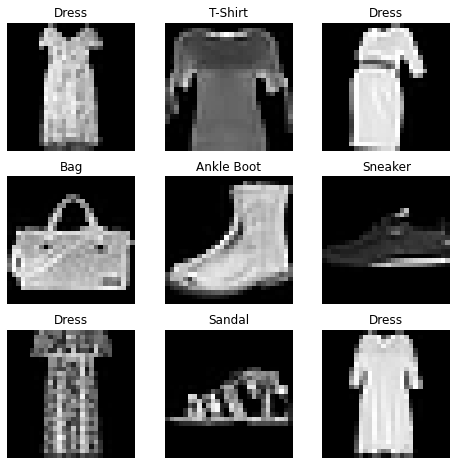

In [12]:
labels_map = {
    0:"T-Shirt", 
    1:'Trouser', 
    2:'Pullover', 
    3:'Dress', 
    4:'Coat', 
    5:'Sandal',
    6:'Shirt', 
    7:'Sneaker',
    8:'Bag',
    9:'Ankle Boot',
}

figure = plt.figure(figsize = (8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis('off')
  plt.imshow(img.squeeze(), cmap = 'gray')
plt.show()

# Prepare your data for training with DataLoaders.


*   Store data in batches
*   Shuffle data in each epoch to reduce model overfitting



In [13]:
from torch.utils.data import DataLoader

In [14]:
train_dataloader = DataLoader(training_data, batch_size = 64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle=True)  

# Iterate through DataLoader.

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


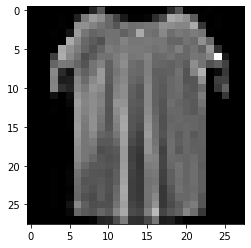

Label:0


In [15]:
#Display image and label 
train_features, train_labels = next(iter(train_dataloader))
print(f'Feature batch shape: {train_features.size()}')
print(f'Labels batch shape: {train_labels.size()}')
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f'Label:{label}')

# **Transforms**
*   Transforms manipulates data to make is suitable for training
 

In [16]:
import torch 
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

In [17]:
ds = datasets.FashionMNIST(
    root = 'data',
    train = True, 
    download = True,
    transform = ToTensor(),
    target_transform = Lambda(lambda y: torch.zeros(10, dtype = torch.float).scatter(0, torch.tensor(y), value = 1))
)

# **Building the Neural Network.**

In [18]:
import os 
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Getting the device for training

In [19]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

Using device: cuda


# Defining Class


*   Define the NN by subclassing nn.Module



In [23]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

# Model Layers


*   ***nn.Linear*** - Applies a linear transformation on the input using its stored weights and biases
*   ***nn.ReLU*** - Introduces non-linearity in your model
*   ***nn.Sequential*** - Ordered container of modules
*   ***nn.Softmax*** - The last linear layer of NN returns logits - raw values [-infinity, infinity] - nn.Softmax scales those values to [0, 1] representing models' predicted probabilities for each class. 



In [24]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [25]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([5], device='cuda:0')


# Model Parameters 

In [26]:
print(f'Model Structure: {model}\n\n')
for name, param in model.named_parameters():
  print(f'Layer: {name} | Size: {param.size()} | Values: {param[:2]}\n')

Model Structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values: tensor([[-0.0096, -0.0104, -0.0012,  ...,  0.0208, -0.0088,  0.0201],
        [ 0.0089, -0.0313, -0.0109,  ..., -0.0182,  0.0066, -0.0212]],
       device='cuda:0', grad_fn=<SliceBackward0>)

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values: tensor([-0.0060, -0.0077], device='cuda:0', grad_fn=<SliceBackward0>)

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values: tensor([[ 0.0398,  0.0395, -0.0426,  ..., -0.0172, -0.0306,  0.0049],
        [-0.0236, -0.0441, -0.0230,  ...,  0.0069,  0.0074,  0.0028]],
       device='cuda:0', grad_fn=<SliceBa

# **Optimizing Model Parameters.**

In [27]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

# Hyperparameters
*   ***Number of Epochs*** - Number of times to iterate over a dataset
*   ***Batch Size*** - The number of data samples propagated through the network 
*   ***Learning Rate*** - How much to update model parameters at each batch. Slow number means slow learning, high number means fast learning but low accuracy.  

In [30]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [31]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.303690  [    0/60000]
loss: 2.293843  [ 6400/60000]
loss: 2.273307  [12800/60000]
loss: 2.272433  [19200/60000]
loss: 2.257659  [25600/60000]
loss: 2.227667  [32000/60000]
loss: 2.236744  [38400/60000]
loss: 2.202502  [44800/60000]
loss: 2.194236  [51200/60000]
loss: 2.170603  [57600/60000]
Test Error: 
 Accuracy: 47.0%, Avg loss: 2.160518 

Epoch 2
-------------------------------
loss: 2.166736  [    0/60000]
loss: 2.158447  [ 6400/60000]
loss: 2.103807  [12800/60000]
loss: 2.119312  [19200/60000]
loss: 2.083040  [25600/60000]
loss: 2.019228  [32000/60000]
loss: 2.046845  [38400/60000]
loss: 1.972014  [44800/60000]
loss: 1.966020  [51200/60000]
loss: 1.898495  [57600/60000]
Test Error: 
 Accuracy: 58.7%, Avg loss: 1.897140 

Epoch 3
-------------------------------
loss: 1.924524  [    0/60000]
loss: 1.897228  [ 6400/60000]
loss: 1.783304  [12800/60000]
loss: 1.818056  [19200/60000]
loss: 1.731518  [25600/60000]
loss: 1.668947  [32000/600

# **Saving and Loading Models.**

In [32]:
import torch 
import torchvision.models as models

In [33]:
model = models.vgg16(pretrained = True)
torch.save(model.state_dict(), 'model_weights.pth')

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [34]:
model = models.vgg16()
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1